-   in this model we are using load Model which is saved in the location.
-   this is the Resnet Model saved in the location , and load by below code

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
import torchvision
from torch.autograd import Variable
from torchvision import datasets, models, transforms
import os
import numpy as np
import argparse
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# load the restnet
model22=torchvision.models.resnet18(pretrained=True)
# freez all the layer in network
for param in model22.parameters():
    param.required_grads=False
num_ftrs=model22.fc.in_features
# reconstruct the last layer
model22.fc=nn.Linear(num_ftrs,2)
model22=model22.cuda()
model22.parameters

<bound method Module.parameters of ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (rel

In [3]:
# model load from saved file

model22.load_state_dict(torch.load('E:/model_save/model.pth.tar'))
model22.eval()

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace)
      (conv2): Co

In [4]:
from scipy.misc import imread, imresize

In [5]:
def testImage(image):
    img=imread(image)
    img=imresize(img,(224,224))
    img=img.transpose(2,0,1)
    img=img/255
    img=torch.FloatTensor(img).cuda()
    normalize=transforms.Normalize(mean=[0.485,0.456,0.406],std=[0.229,0.224,0.225])
    transform=transforms.Compose([normalize])
    img=transform(img)
    return img

In [6]:
class_names=['NORMAL', 'PNEUMONIA']

In [7]:
def imshow(inp, title=None):
    """ IMshow for Tensor"""
    inp=inp.numpy().transpose((1,2,0))
    mean=np.array([0.485, 0.456, 0.406])
    std=np.array([0.299,0.244,0.255])
    inp= std * inp + mean
    inp=np.clip(inp,0,1)
    plt.imshow(inp)
    if title is not None:
        plt.title(title)
    plt.pause(0.001)

In [8]:
def pred_method(path,class_names):
    #class_names=['NORMAL', 'PNEUMONIA']
    img=testImage(path)
    testImg=img.unsqueeze(0)
    testImg=testImg.cuda(0)
    output=model22(testImg)
    _,predict= torch.max(output, 1)
    img1=img.cpu()
    imshow(img1)
    print(class_names[predict])
    

C:\Users\admin\Anaconda3\envs\pyt\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  
C:\Users\admin\Anaconda3\envs\pyt\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  This is separate from the ipykernel package so we can avoid doing imports until


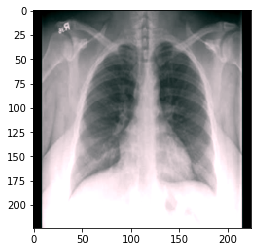

NORMAL


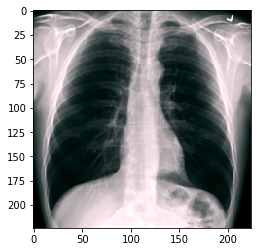

NORMAL


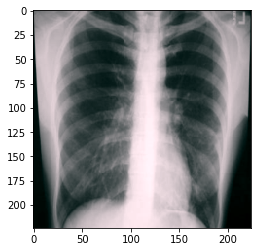

PNEUMONIA


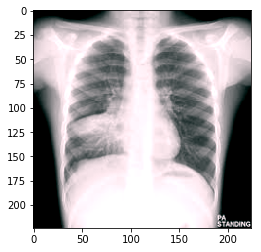

PNEUMONIA


In [17]:
path='E:/testimg/leaver/nmrl11.jpg'
pred_method(path, class_names)
path1='E:/testimg/leaver/nmrl22.jpg'
pred_method(path1, class_names) 
path2='E:/testimg/leaver/pnem1.jpg'
pred_method(path2, class_names) 
path3='E:/testimg/leaver/pnem2.jpg'
pred_method(path3, class_names) 
